This should read in the built model and do the model evaluation.

In [1]:
# Import analysis packages:
import pandas as pd
import numpy as np

import random

# Import plotting packages:
from matplotlib import pyplot as plt
import seaborn as sns 

# Import performance-measuring methods:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import load_model

In [2]:
from DataPreprocessing import output_train_test_data

In [3]:
# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
random.seed(11)

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(11)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(11)

# Obtaining baseline predictions

In [4]:
scaled_training_data, training_labels, scaled_valid_data, valid_labels, \
     scaled_test_data, test_labels = output_train_test_data()

true_cover_classes = np.argmax(test_labels, axis = 1)

cover_types = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir',\
               'Krummholz']

Proportion of Data Points per Class, Full Data Set:
2    0.4876
1    0.3646
3    0.0615
7    0.0353
6    0.0299
5    0.0163
4    0.0047
Name: class, dtype: float64

Proportion of Data Points per Class, Training Data Subset:
2    0.4876
1    0.3646
3    0.0615
7    0.0353
6    0.0299
5    0.0163
4    0.0047
Name: class, dtype: float64

Proportion of Data Points per Class, Validation Data Subset:
2    0.4876
1    0.3646
3    0.0615
7    0.0353
6    0.0299
5    0.0163
4    0.0047
Name: class, dtype: float64

Proportion of Data Points per Class, Test Data Subset:
2    0.4876
1    0.3646
3    0.0615
7    0.0353
6    0.0299
5    0.0163
4    0.0047
Name: class, dtype: float64
Training Data and Labels Shapes:
(406708, 53) (406708, 7)

Validation Data and Labels Shapes:
(87152, 53) (87152, 7)

Test Data and Labels Shapes:
(87152, 53) (87152, 7)


In [ ]:
# dis very handy:
#https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

              precision    recall  f1-score   support

           0       0.37      0.65      0.47     31776
           1       0.49      0.31      0.38     42495
           2       0.06      0.02      0.03      5363
           3       0.00      0.00      0.00       412
           4       0.02      0.01      0.01      1424
           5       0.03      0.01      0.01      2605
           6       0.04      0.01      0.02      3077

    accuracy                           0.39     87152
   macro avg       0.14      0.14      0.13     87152
weighted avg       0.38      0.39      0.36     87152

[[20545  9805   645    31   150   273   327]
 [27485 13107   817    61   220   407   398]
 [ 3438  1683   108     6    24    50    54]
 [  271   126     4     0     2     4     5]
 [  894   455    36     1     8    14    16]
 [ 1678   805    58     2    13    21    28]
 [ 1927  1016    63     3    12    24    32]]


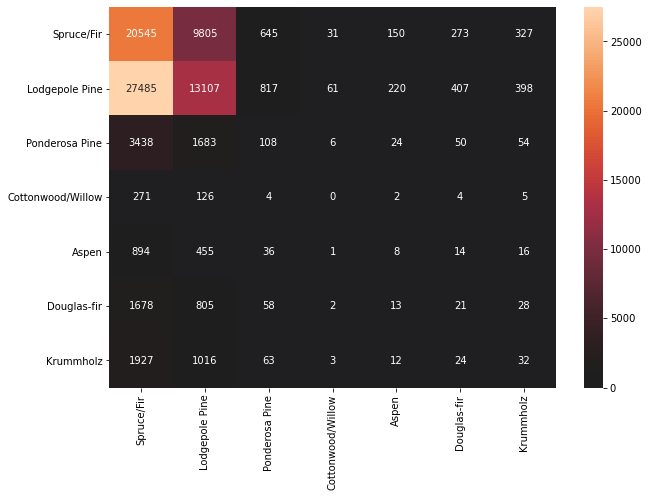

In [5]:
dummy_clf = DummyClassifier(strategy="stratified", random_state = 11)
dummy_clf.fit(scaled_training_data, training_labels)
dummy_predictions = dummy_clf.predict(scaled_test_data)
dummy_clf.score(scaled_test_data, test_labels)

pred_dummy_classes = np.argmax(dummy_predictions, axis = 1)

print(classification_report(true_cover_classes, pred_dummy_classes, zero_division = 'warn'))

dummy_confuse_mat = confusion_matrix(true_cover_classes, pred_dummy_classes)
print(dummy_confuse_mat)

dummy_confuse_df = pd.DataFrame(dummy_confuse_mat, index = cover_types, columns = cover_types)
plt.figure(figsize = (10,7))
sns.heatmap(dummy_confuse_df, annot=True, center=1000, fmt="d")
plt.show()

# Evaluating the Model

In [6]:
nn_model = load_model("cover_model_MAC")
nn_model_history = pd.read_csv('nn_model_history.log', sep=',', engine='python')

print(nn_model_history.head())

   epoch  accuracy      loss  precision    recall  val_accuracy  val_loss  \
0      0  0.714830  0.672749   0.734904  0.686148      0.764113  0.553522   
1      1  0.774659  0.523751   0.785880  0.758886      0.793154  0.473910   
2      2  0.803916  0.458067   0.814175  0.790759      0.804457  0.449051   
3      3  0.825435  0.412145   0.833763  0.815612      0.839499  0.383303   
4      4  0.840945  0.379348   0.847889  0.832843      0.852270  0.352683   

   val_precision  val_recall  
0       0.773635    0.747785  
1       0.801787    0.782633  
2       0.812335    0.796321  
3       0.845457    0.832545  
4       0.859350    0.845052  


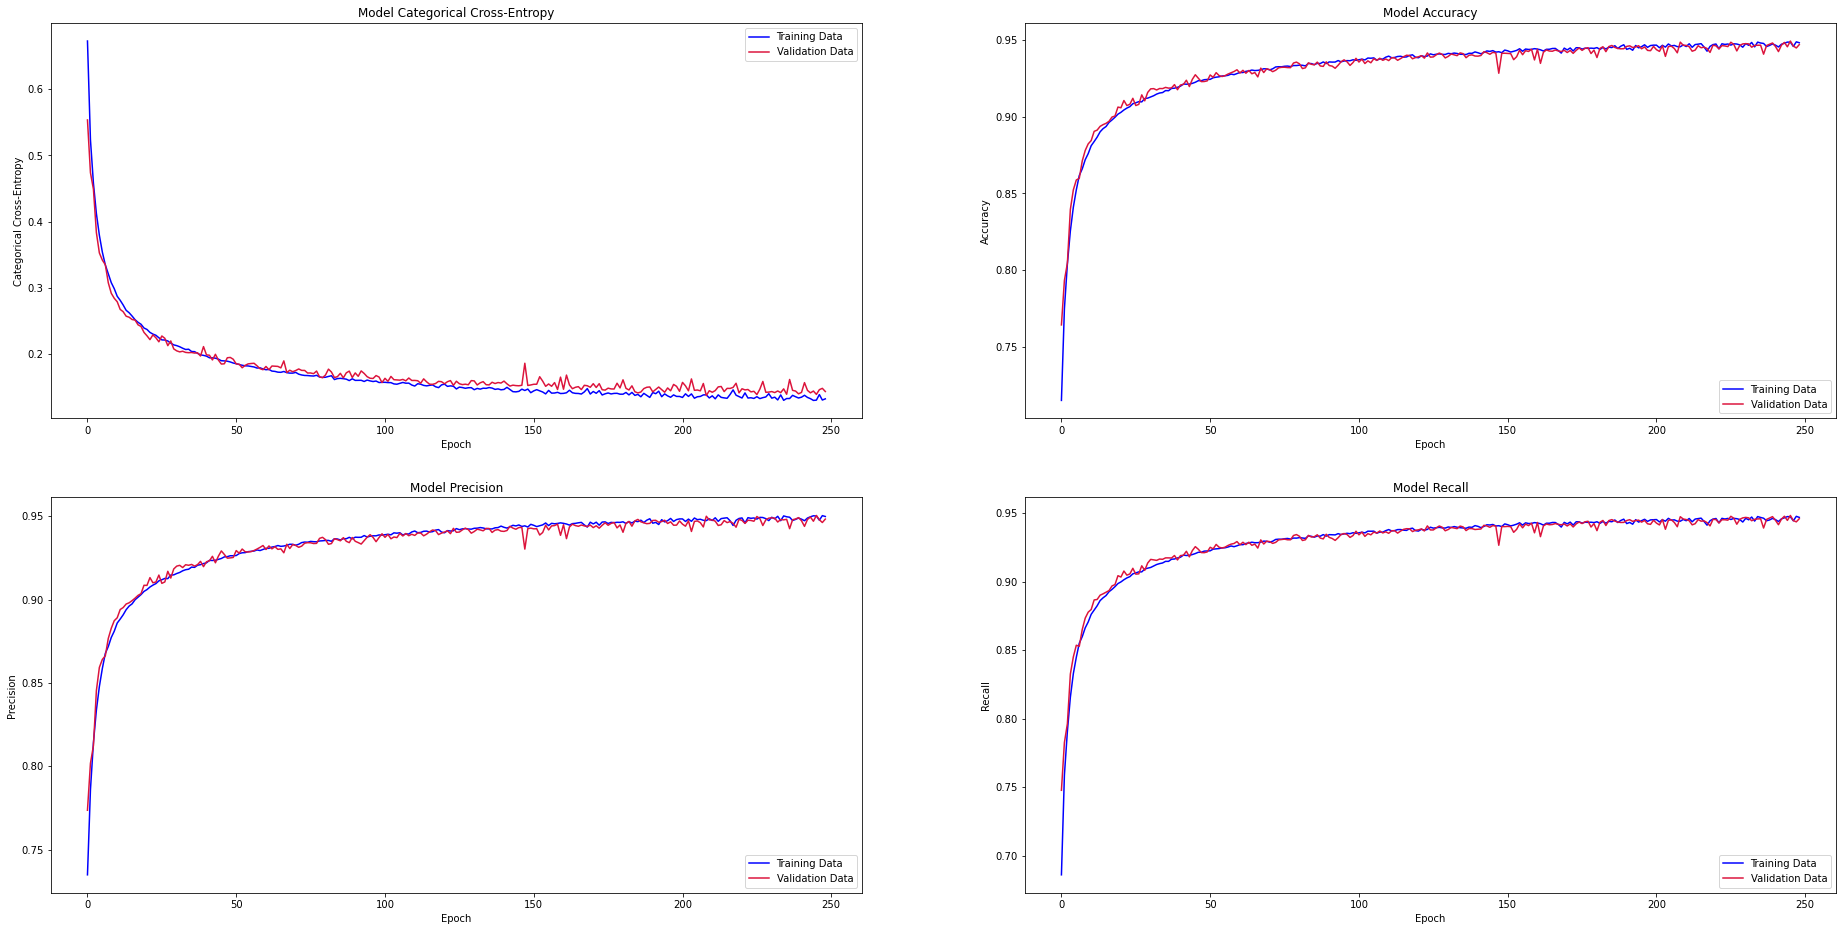

In [7]:
plt.figure(figsize=(32,16))
plt.subplots_adjust(hspace=0.2,wspace=0.2)

plt.subplot(2, 2, 1)
plt.plot(nn_model_history['epoch'], nn_model_history['loss'], color = 'blue')
plt.plot(nn_model_history['epoch'], nn_model_history['val_loss'], color = 'crimson')
plt.title('Model Categorical Cross-Entropy')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper right')

plt.subplot(2, 2, 2)
plt.plot(nn_model_history['epoch'], nn_model_history['accuracy'], color = 'blue')
plt.plot(nn_model_history['epoch'], nn_model_history['val_accuracy'], color = 'crimson')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')

plt.subplot(2, 2, 3)
plt.plot(nn_model_history['epoch'], nn_model_history['precision'], color = 'blue')
plt.plot(nn_model_history['epoch'], nn_model_history['val_precision'], color = 'crimson')
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')

plt.subplot(2, 2, 4)
plt.plot(nn_model_history['epoch'], nn_model_history['recall'], color = 'blue')
plt.plot(nn_model_history['epoch'], nn_model_history['val_recall'], color = 'crimson')
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')

In [8]:
model_predictions = nn_model.predict(scaled_test_data)

model_crossentropy, model_accuracy, model_precision, model_recall = \
     nn_model.evaluate(scaled_test_data, test_labels, verbose = 0)

In [9]:
pred_cover_classes = np.argmax(model_predictions, axis = 1)

print(classification_report(true_cover_classes, pred_cover_classes, zero_division = 'warn'))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     31776
           1       0.95      0.96      0.96     42495
           2       0.95      0.95      0.95      5363
           3       0.89      0.84      0.87       412
           4       0.84      0.85      0.85      1424
           5       0.90      0.93      0.91      2605
           6       0.96      0.94      0.95      3077

    accuracy                           0.95     87152
   macro avg       0.92      0.92      0.92     87152
weighted avg       0.95      0.95      0.95     87152



[[29697  1917     0     0    33     3   126]
 [ 1187 40963    87     0   189    61     8]
 [    1    59  5095    33    11   164     0]
 [    0     0    40   347     0    25     0]
 [   16   158    25     0  1216     9     0]
 [    4    73   104     8     2  2414     0]
 [  135    54     1     0     0     0  2887]]


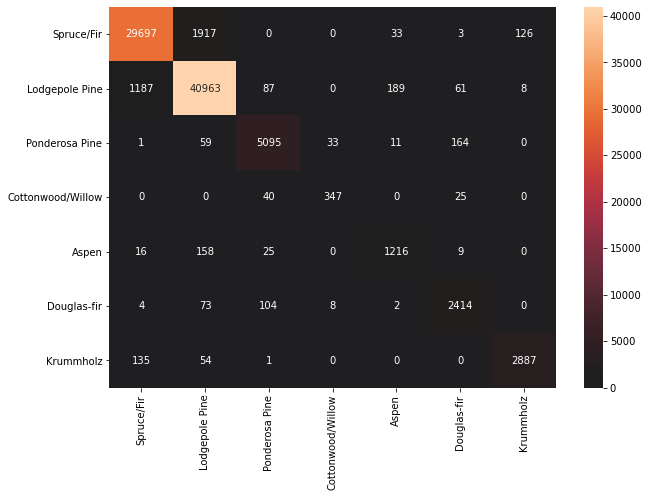

In [10]:
confuse_mat = confusion_matrix(true_cover_classes, pred_cover_classes)
print(confuse_mat)

cover_types = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir',\
               'Krummholz']

confuse_df = pd.DataFrame(confuse_mat, index = cover_types, columns = cover_types)
plt.figure(figsize = (10,7))
sns.heatmap(confuse_df, annot=True, center=1000, fmt="d")
plt.show()